# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
from datetime import datetime
%matplotlib notebook
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
pd.read_csv('appl_1980_2014.csv')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [3]:
apple=pd.read_csv('appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [7]:
apple['Date']=pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 529.1 KB


### Step 6.  Set the date as the index

In [6]:
apple.index=apple['Date']
print(apple.index)

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)


### Step 7.  Is there any duplicate dates?

In [8]:
apple.index.is_unique
#중복된 날짜는 없다.

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
apple=apple.sort_index()
apple

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [10]:
apple['year']=apple.Date.dt.year
apple['month']=apple.Date.dt.month
apple['day']=apple.Date.dt.day
apple.groupby(by=['year','month']).max('day')['day']

year  month
1980  12       31
1981  1        30
      2        27
      3        31
      4        30
               ..
2014  3        31
      4        30
      5        30
      6        30
      7         8
Name: day, Length: 404, dtype: int64

### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
apple['Date'].max()-apple['Date'].min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [12]:
apple.groupby(['year','month']).count().shape
#404 months

(404, 8)

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<IPython.core.display.Javascript object>


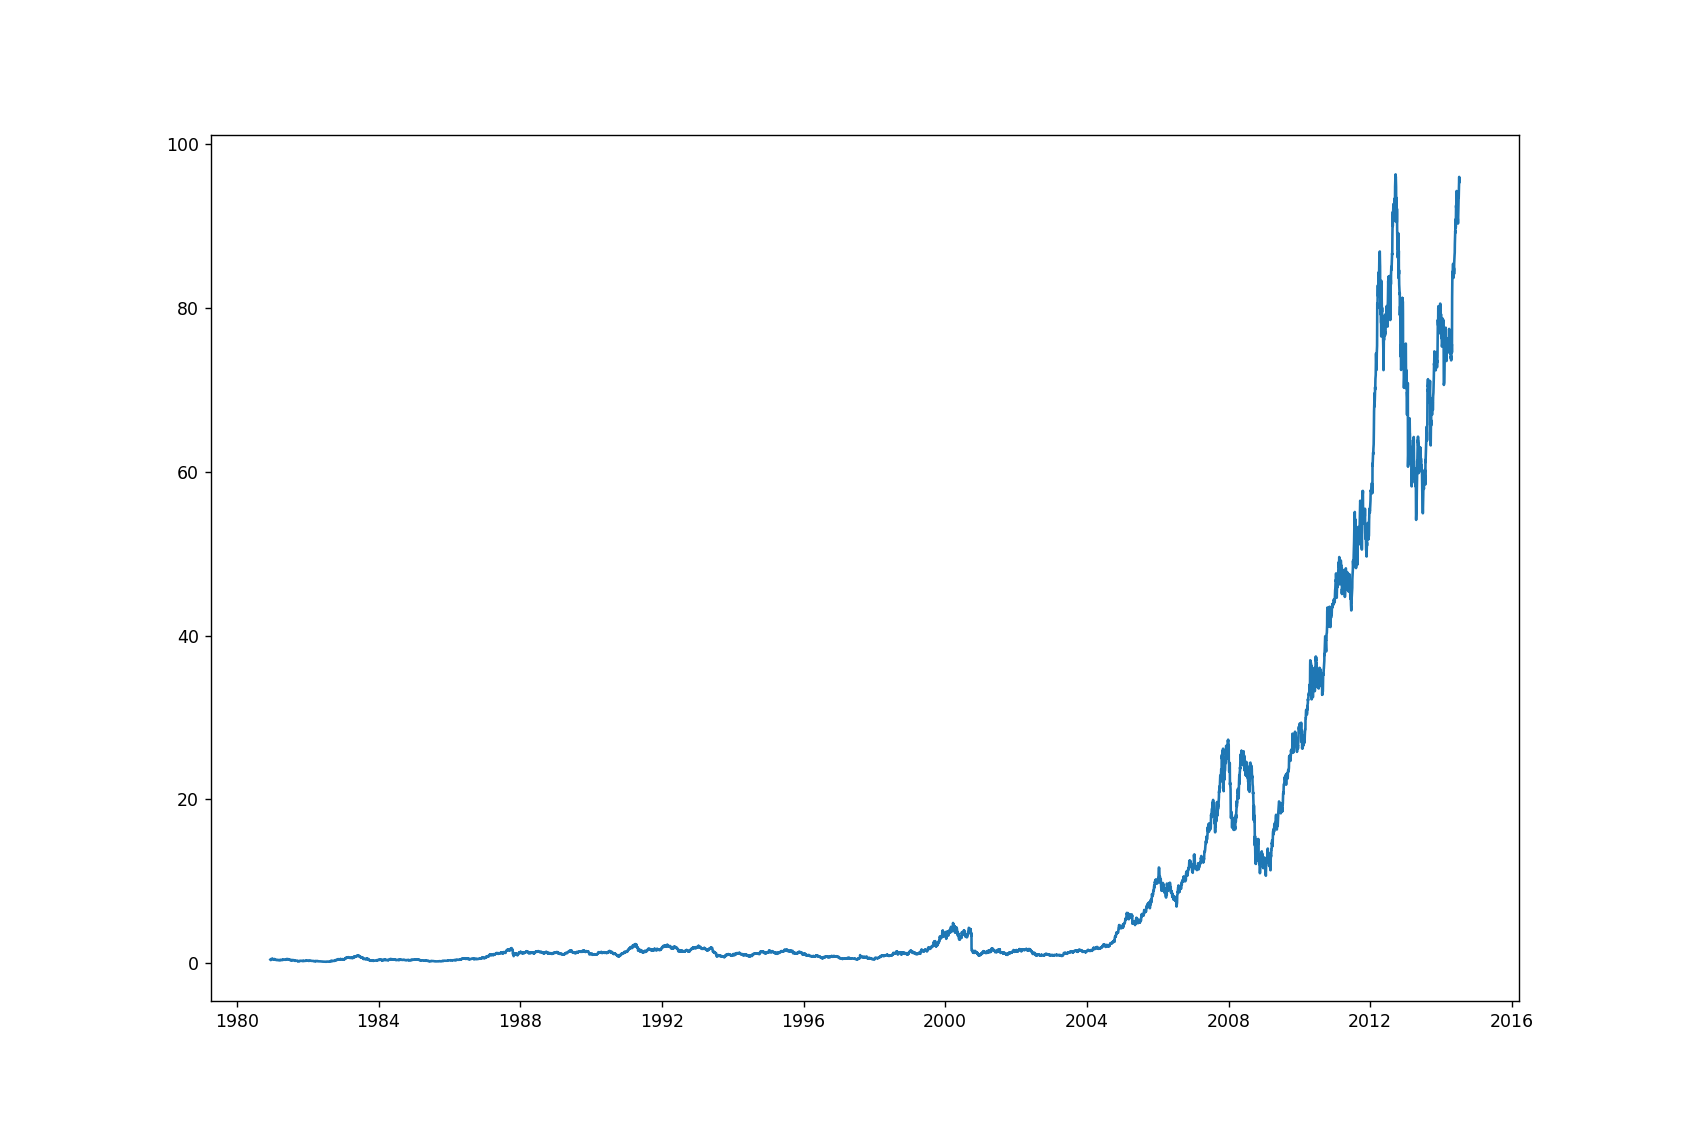

In [13]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])

### BONUS: Create your own question and answer it.

**연도별 수익 변동**

* 해가 지남에 따라 수익률이 점점 늘어나지만 그와 비례해서 수익 변동성도 늘어나 투자 위험성도 커진다.

<IPython.core.display.Javascript object>


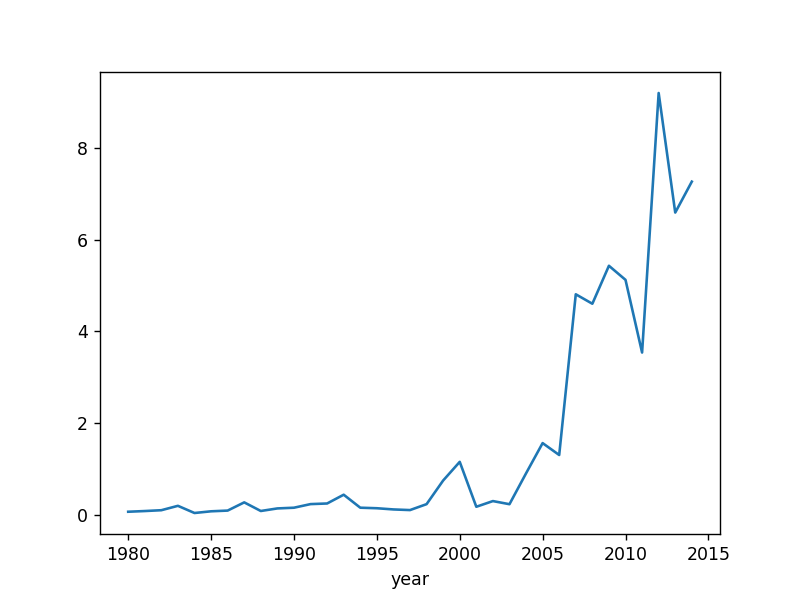

In [18]:
apple_risk=apple.groupby(['year'])['Adj Close'].std()
fig, ax=plt.subplots()
ax=apple_risk.plot()